In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

pd.options.display.max_rows = 1000

In [ ]:
# PATH is have to be changed by your PATH
acc_df = pd.read_csv("/content/drive/MyDrive/정상빈/미니프로젝트 EDA/accepted_2007_to_2018Q4.csv")
rej_df = pd.read_csv("/content/drive/MyDrive/정상빈/미니프로젝트 EDA/rejected_2007_to_2018Q4.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
acc_df.shape

(2260701, 151)

In [ ]:
acc_df.head().T

,0,1,2,3,4
id,68407277,68355089,68341763,66310712,68476807
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,3600,24700,20000,35000,10400
funded_amnt,3600,24700,20000,35000,10400
funded_amnt_inv,3600,24700,20000,35000,10400
term,36 months,36 months,60 months,60 months,60 months
int_rate,13.99,11.99,10.78,14.85,22.45
installment,123.03,820.28,432.66,829.9,289.91
grade,C,C,B,C,F
sub_grade,C4,C1,B4,C5,F1


In [ ]:
rej_df.head().T

,0,1,2,3,4
Amount Requested,1000,1000,11000,6000,1500
Application Date,2007-05-26,2007-05-26,2007-05-27,2007-05-27,2007-05-27
Loan Title,Wedding Covered but No Honeymoon,Consolidating Debt,Want to consolidate my debt,waksman,mdrigo
Risk_Score,693,703,715,698,509
Debt-To-Income Ratio,10%,10%,10%,38.64%,9.43%
Zip Code,481xx,010xx,212xx,017xx,209xx
State,NM,MA,MD,MA,MD
Employment Length,4 years,< 1 year,1 year,< 1 year,< 1 year
Policy Code,0,0,0,0,0


In [ ]:
droped = acc_df.columns[acc_df.isnull().sum() > 10000]

data = acc_df.drop(droped, axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 56 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   loan_amnt                   float64
 2   funded_amnt                 float64
 3   funded_amnt_inv             float64
 4   term                        object 
 5   int_rate                    float64
 6   installment                 float64
 7   grade                       object 
 8   sub_grade                   object 
 9   home_ownership              object 
 10  annual_inc                  float64
 11  verification_status         object 
 12  issue_d                     object 
 13  loan_status                 object 
 14  pymnt_plan                  object 
 15  url                         object 
 16  purpose                     object 
 17  zip_code                    object 
 18  addr_state                  object 
 19  dti                  

In [ ]:
data.isnull().sum()

id                               0
loan_amnt                       33
funded_amnt                     33
funded_amnt_inv                 33
term                            33
int_rate                        33
installment                     33
grade                           33
sub_grade                       33
home_ownership                  33
annual_inc                      37
verification_status             33
issue_d                         33
loan_status                     33
pymnt_plan                      33
url                             33
purpose                         33
zip_code                        34
addr_state                      33
dti                           1744
delinq_2yrs                     62
earliest_cr_line                62
fico_range_low                  33
fico_range_high                 33
inq_last_6mths                  63
open_acc                        62
pub_rec                         62
revol_bal                       33
revol_util          

In [ ]:
data.drop(data[data['loan_amnt'].isnull()].index, axis=0, inplace=True)

data.isnull().sum()

id                               0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
home_ownership                   0
annual_inc                       4
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
zip_code                         1
addr_state                       0
dti                           1711
delinq_2yrs                     29
earliest_cr_line                29
fico_range_low                   0
fico_range_high                  0
inq_last_6mths                  30
open_acc                        29
pub_rec                         29
revol_bal                        0
revol_util          

In [ ]:
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,0.0,0.0,0.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Mar-2019,679.0,675.0,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N


In [ ]:
corr_data = data.corr()
corr_data

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
loan_amnt,1.000000,0.999755,0.999038,0.098082,0.945625,0.197246,0.043542,-0.009277,0.110585,0.110584,-0.027840,0.182229,-0.058772,0.316715,0.099078,0.199570,0.462180,0.462194,0.668223,0.668268,0.593142,0.591755,0.075230,0.125173,0.120157,0.322613,0.093664,0.077969,-0.021849,NaN,-0.000528,-0.003796,0.000876,-0.083562,0.007553
funded_amnt,0.999755,1.000000,0.999341,0.098097,0.945967,0.197207,0.043745,-0.009173,0.110164,0.110163,-0.028132,0.182392,-0.058636,0.316643,0.099132,0.199483,0.462600,0.462614,0.668126,0.668228,0.593072,0.591617,0.075256,0.125168,0.120210,0.322615,0.093611,0.077930,-0.021785,NaN,-0.000494,-0.003751,0.000886,-0.083447,0.007625
funded_amnt_inv,0.999038,0.999341,1.000000,0.098129,0.945118,0.197025,0.044276,-0.009029,0.109871,0.109870,-0.030063,0.182601,-0.058288,0.316024,0.099087,0.199413,0.463289,0.463305,0.667181,0.668441,0.592148,0.591089,0.074937,0.124840,0.119829,0.322420,0.093744,0.078122,-0.021618,NaN,-0.000441,-0.003647,0.000900,-0.083253,0.007773
int_rate,0.098082,0.098097,0.098129,1.000000,0.123949,-0.050583,0.124491,0.058909,-0.415995,-0.415991,0.188399,-0.010472,0.053381,-0.028880,0.262670,-0.040951,0.018586,0.018612,0.099489,0.099582,-0.028987,0.415898,0.069250,0.148350,0.137993,0.077482,-0.349210,-0.273459,0.018299,NaN,0.015562,0.014187,0.004939,0.056653,0.013887
installment,0.945625,0.945967,0.945118,0.123949,1.000000,0.190270,0.044841,0.002053,0.053291,0.053291,-0.002391,0.171445,-0.047035,0.302816,0.120951,0.178342,0.377755,0.377740,0.665834,0.665765,0.611447,0.526735,0.086049,0.122656,0.117942,0.310668,0.062535,0.053799,-0.017488,NaN,0.002121,-0.001055,0.002048,-0.075078,0.014310
annual_inc,0.197246,0.197207,0.197025,-0.050583,0.190270,1.000000,-0.082619,0.026134,0.037009,0.037008,0.020001,0.094377,-0.002543,0.190760,0.028207,0.115271,0.082271,0.082274,0.140322,0.140296,0.139057,0.083704,0.020607,0.010189,0.010282,0.075503,0.036527,0.033936,-0.003484,NaN,0.007322,0.004656,0.003848,-0.027132,0.024444
dti,0.043542,0.043745,0.044276,0.124491,0.044841,-0.082619,1.000000,-0.012212,-0.027929,-0.027931,-0.012189,0.186124,-0.026029,0.102147,0.115225,0.147335,0.065497,0.065490,-0.004509,-0.003977,-0.027240,0.061766,0.001692,0.022017,0.022743,-0.018325,-0.033341,-0.018697,-0.007025,NaN,-0.000195,-0.003290,-0.003739,-0.012379,-0.020504
delinq_2yrs,-0.009277,-0.009173,-0.009029,0.058909,0.002053,0.026134,-0.012212,1.000000,-0.178913,-0.178910,0.024260,0.048956,-0.021810,-0.026779,-0.000200,0.118554,-0.029469,-0.029477,0.015036,0.015165,0.006266,0.031291,0.037439,0.016627,0.017004,-0.005746,-0.095409,-0.057187,0.071878,NaN,0.116076,0.140038,0.028506,-0.049313,0.011384
fico_range_low,0.110585,0.110164,0.109871,-0.415995,0.053291,0.037009,-0.027929,-0.178913,1.000000,1.000000,-0.093276,0.018407,-0.188583,0.010711,-0.477001,0.016193,0.120649,0.120671,0.013465,0.013209,0.057959,-0.113887,-0.037091,-0.057988,-0.055861,0.036567,0.397607,0.291663,-0.073772,NaN,-0.038108,-0.053949,-0.011029,-0.196426,-0.059256
fico_range_high,0.110584,0.110163,0.109870,-0.415991,0.053291,0.037008,-0.027931,-0.178910,1.000000,1.000000,-0.093277,0.018405,-0.188580,0.010709,-0.476999,0.016192,0.120648,0.120670,0.013464,0.013209,0.057958,-0.113886,-0.037090,-0.057987,-0.055861,0.036567,0.397607,0.291662,-0.073771,NaN,-0.038107,-0.053948,-0.011029,-0.196423,-0.059255


In [ ]:
data.drop(data[data['annual_inc'] == max(data['annual_inc'])].index, axis=0, inplace=True)
data.drop(data[data['annual_inc'] == max(data['annual_inc'])].index, axis=0, inplace=True)

In [ ]:
df = pd.DataFrame({'loan_amnt':data['loan_amnt'],
              'term':data['term'],
              'int_rate':data['int_rate'],
              'grade':data['grade'],
              'sub_grade':data['sub_grade'],
              'home_ownership':data['home_ownership'],
              'annual_inc':data['annual_inc'],
              'verification_status':data['verification_status'],
              'loan_status':data['loan_status'],
              'purpose':data['purpose'],
              'addr_state':data['addr_state'],
              'dti':data['dti'],
              'fico_range_middle':(data['fico_range_high']+data['fico_range_low'])/2,
              'total_pymnt':data['total_pymnt'],
              'total_rec_int':data['total_rec_int']})

df.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,fico_range_middle,total_pymnt,total_rec_int
0,3600.0,36 months,13.99,C,C4,MORTGAGE,55000.0,Not Verified,Fully Paid,debt_consolidation,PA,5.91,677.0,4421.723917,821.72
1,24700.0,36 months,11.99,C,C1,MORTGAGE,65000.0,Not Verified,Fully Paid,small_business,SD,16.06,717.0,25679.660000,979.66
2,20000.0,60 months,10.78,B,B4,MORTGAGE,63000.0,Not Verified,Fully Paid,home_improvement,IL,10.78,697.0,22705.924294,2705.92
3,35000.0,60 months,14.85,C,C5,MORTGAGE,110000.0,Source Verified,Current,debt_consolidation,NJ,17.06,787.0,31464.010000,12361.66
4,10400.0,60 months,22.45,F,F1,MORTGAGE,104433.0,Source Verified,Fully Paid,major_purchase,PA,25.37,697.0,11740.500000,1340.50


In [ ]:
df.sort_values(by=['grade'], axis=0, inplace=True)

In [ ]:
# Making grade to score
fix_dict = """A:7 B:6 C:5 D:4 E:3 F:2 G:1"""

fix_dict = dict(dictset.split(':') for dictset in fix_dict.split())
df['scored_grade'] = df['grade'].apply(lambda v: fix_dict.get(v, v))

# To numerical calculation, Make scored_grade into numerical
df['scored_grade'] = df['scored_grade'].apply(pd.to_numeric)

In [ ]:
# Also Sub_grade reflect to scored_grade
df['scored_grade'] += (5 - df['sub_grade'].str.get(i=-1).apply(pd.to_numeric)) * 0.2
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,fico_range_middle,total_pymnt,total_rec_int,scored_grade
1130347,8500.0,36 months,6.99,A,A3,MORTGAGE,40000.0,Not Verified,Charged Off,debt_consolidation,TX,8.40,687.0,8077.570000,912.08,7.4
425950,4200.0,36 months,6.71,A,A3,MORTGAGE,99000.0,Not Verified,Current,credit_card,MO,5.67,692.0,1422.780000,227.64,7.4
425949,17500.0,36 months,7.34,A,A4,MORTGAGE,25000.0,Not Verified,Current,home_improvement,CT,33.32,777.0,6566.820000,1097.33,7.2
1963902,12000.0,36 months,8.59,A,A5,MORTGAGE,95000.0,Not Verified,Fully Paid,credit_card,PA,16.79,722.0,13136.267598,1136.27,7.0
425945,35000.0,36 months,5.31,A,A1,RENT,120000.0,Source Verified,Fully Paid,debt_consolidation,CA,2.51,832.0,36028.642716,1028.64,7.8


In [ ]:
# PATH is have to be changed by your PATH
df.to_csv("/content/drive/MyDrive/정상빈/미니프로젝트 EDA/df.csv")
data.to_csv("/content/drive/MyDrive/정상빈/미니프로젝트 EDA/data.csv")

# 런타임 오류시 여기서부터!!!!!

### 이 전 코드는 데이터 전처리 과정입니다.
### 이 후 코드는 시각화에 따른 분석 과정입니다.

In [ ]:
# PATH is have to be changed by your PATH
data = pd.read_csv("/content/drive/MyDrive/정상빈/미니프로젝트 EDA/data.csv")
df = pd.read_csv("/content/drive/MyDrive/정상빈/미니프로젝트 EDA/df.csv")

In [ ]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,fico_range_middle,total_pymnt,total_rec_int,scored_grade
1130347,8500.0,36 months,6.99,A,A3,MORTGAGE,40000.0,Not Verified,Charged Off,debt_consolidation,TX,8.40,687.0,8077.570000,912.08,7.4
425950,4200.0,36 months,6.71,A,A3,MORTGAGE,99000.0,Not Verified,Current,credit_card,MO,5.67,692.0,1422.780000,227.64,7.4
425949,17500.0,36 months,7.34,A,A4,MORTGAGE,25000.0,Not Verified,Current,home_improvement,CT,33.32,777.0,6566.820000,1097.33,7.2
1963902,12000.0,36 months,8.59,A,A5,MORTGAGE,95000.0,Not Verified,Fully Paid,credit_card,PA,16.79,722.0,13136.267598,1136.27,7.0
425945,35000.0,36 months,5.31,A,A1,RENT,120000.0,Source Verified,Fully Paid,debt_consolidation,CA,2.51,832.0,36028.642716,1028.64,7.8


In [ ]:
corr = df.corr()
corr

,loan_amnt,int_rate,annual_inc,dti,fico_range_middle,total_pymnt,total_rec_int,scored_grade
loan_amnt,1.000000,0.098082,0.293221,0.043542,0.110585,0.668223,0.591755,-0.101190
int_rate,0.098082,1.000000,-0.074870,0.124490,-0.415994,0.099489,0.415898,-0.976486
annual_inc,0.293221,-0.074870,1.000000,-0.121876,0.055338,0.209349,0.124466,0.076225
dti,0.043542,0.124490,-0.121876,1.000000,-0.027930,-0.004509,0.061766,-0.123279
fico_range_middle,0.110585,-0.415994,0.055338,-0.027930,1.000000,0.013464,-0.113887,0.438035
total_pymnt,0.668223,0.099489,0.209349,-0.004509,0.013464,1.000000,0.693782,-0.141303
total_rec_int,0.591755,0.415898,0.124466,0.061766,-0.113887,0.693782,1.000000,-0.452258
scored_grade,-0.101190,-0.976486,0.076225,-0.123279,0.438035,-0.141303,-0.452258,1.000000


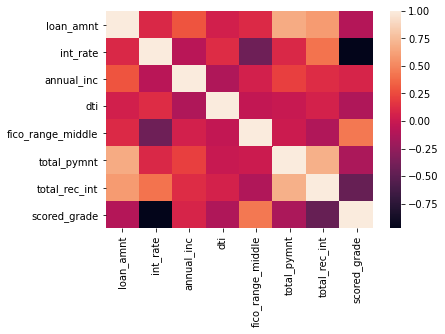

In [ ]:
sns.heatmap(corr)

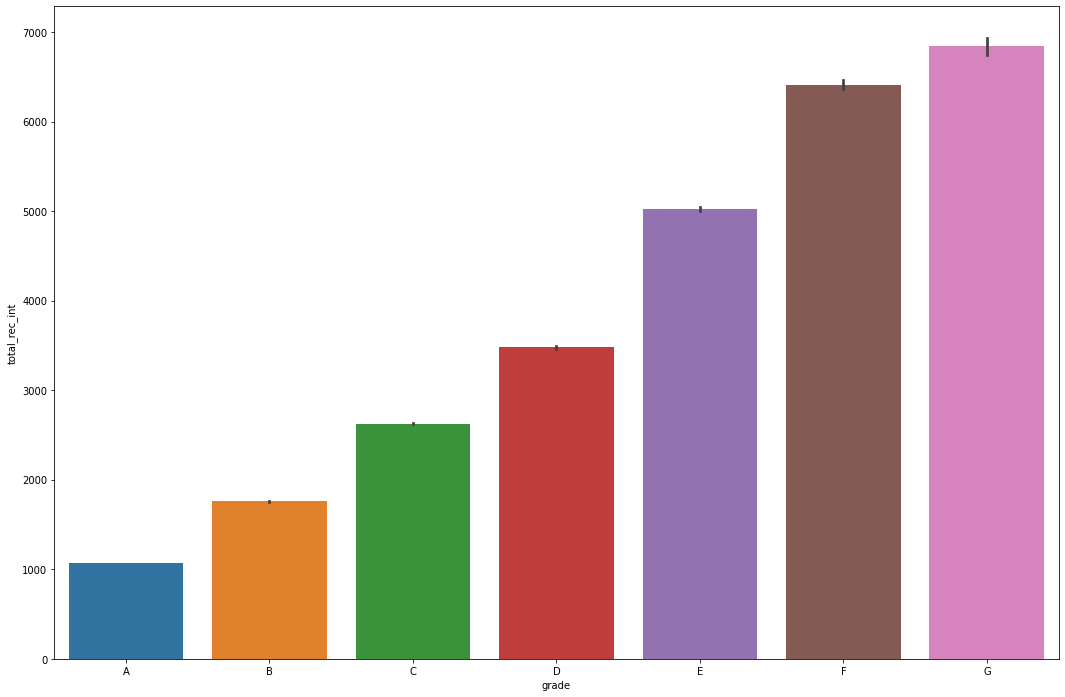

In [ ]:
plt.figure(figsize=(18, 12))
sns.barplot(data= df, y = 'int_rate', x = 'grade')

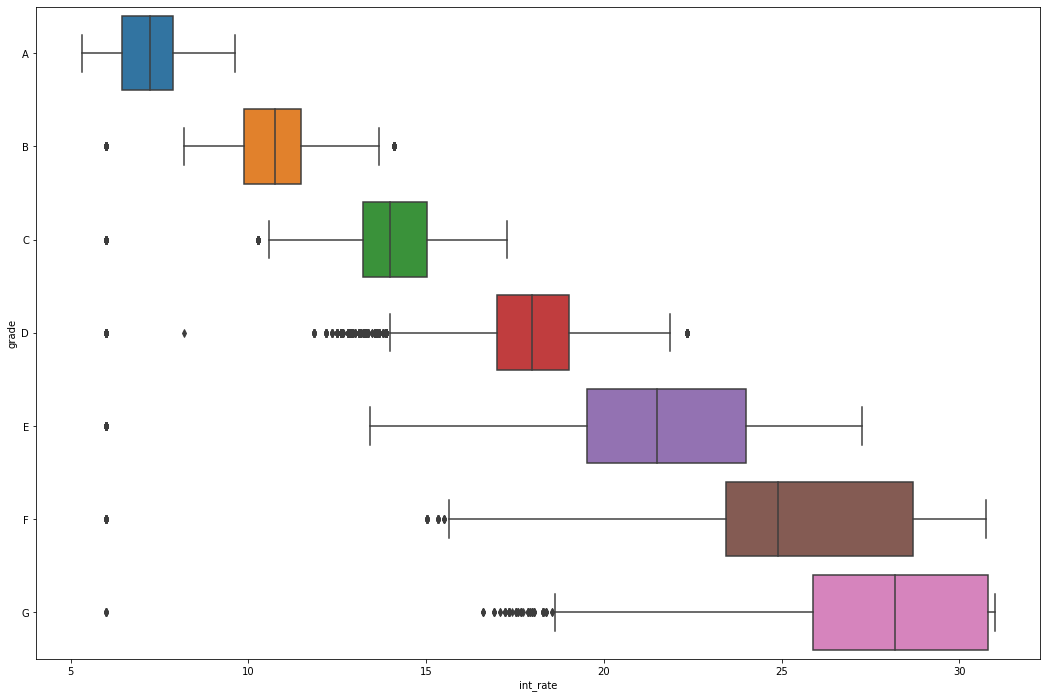

In [ ]:
plt.figure(figsize=(18, 12))
sns.boxplot(data= df, x = 'int_rate', y = 'grade')

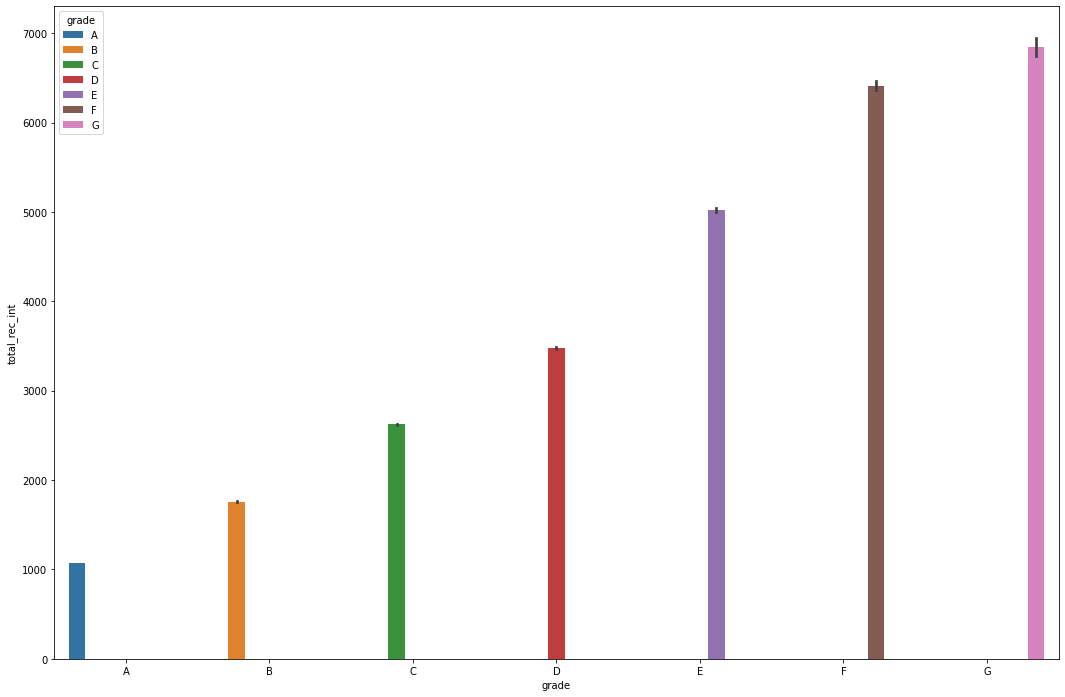

In [ ]:
plt.figure(figsize=(18, 12))
sns.barplot(data= df, y = 'total_rec_int', x = 'grade', hue = 'grade')

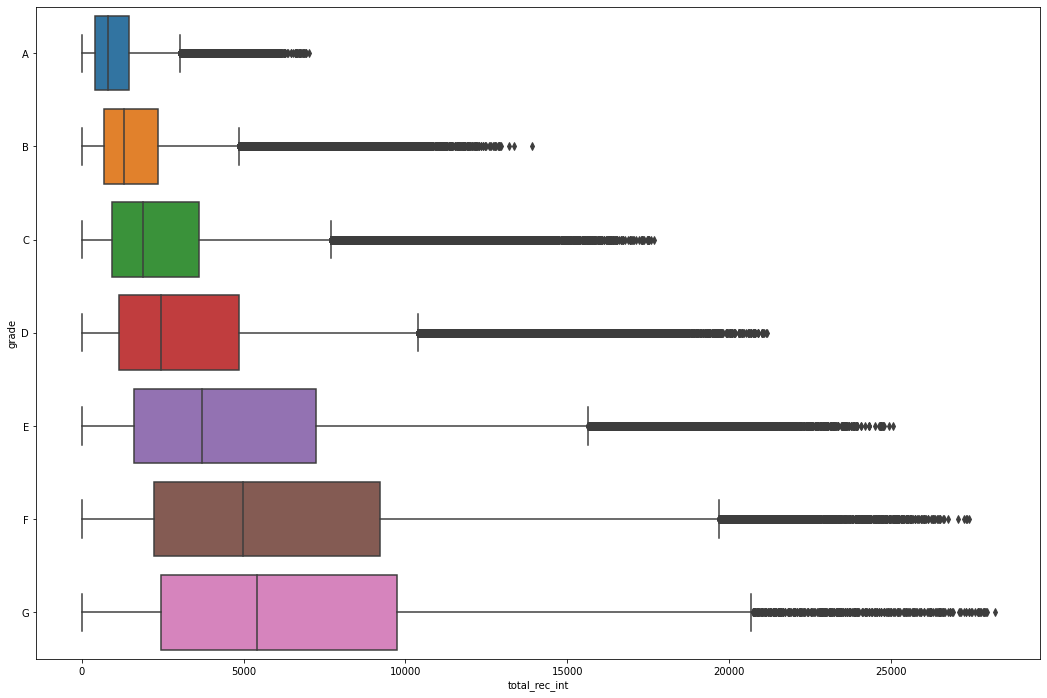

In [ ]:
plt.figure(figsize=(18, 12))
sns.boxplot(data= df, x = 'total_rec_int', y = 'grade')

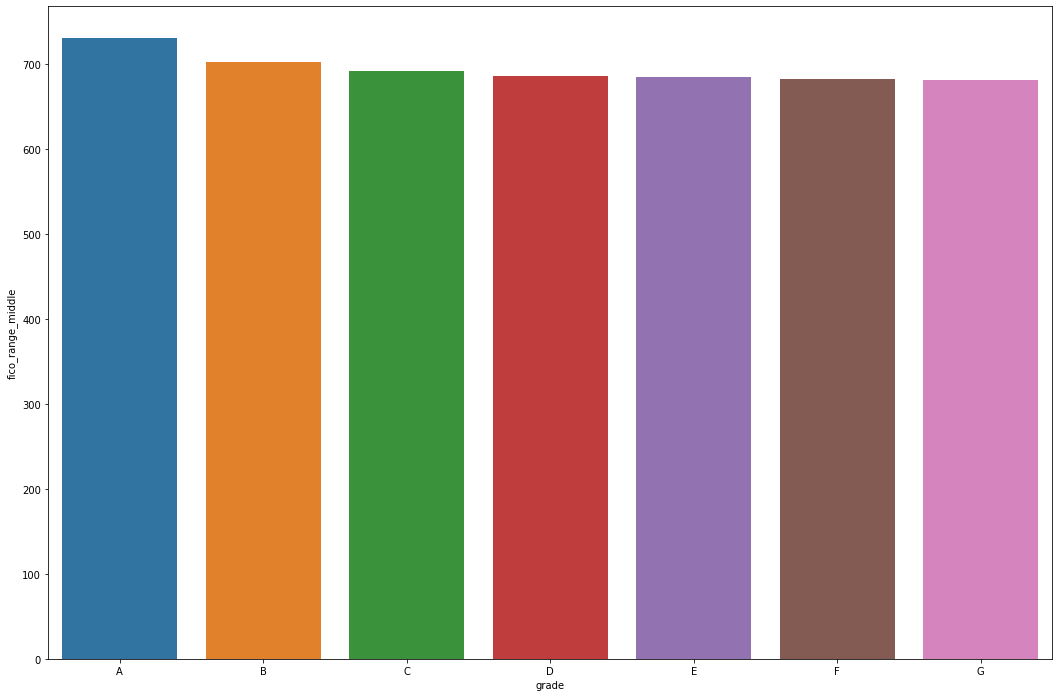

In [ ]:
plt.figure(figsize=(18, 12))
sns.barplot(data= df, y = 'fico_range_middle', x = 'grade')

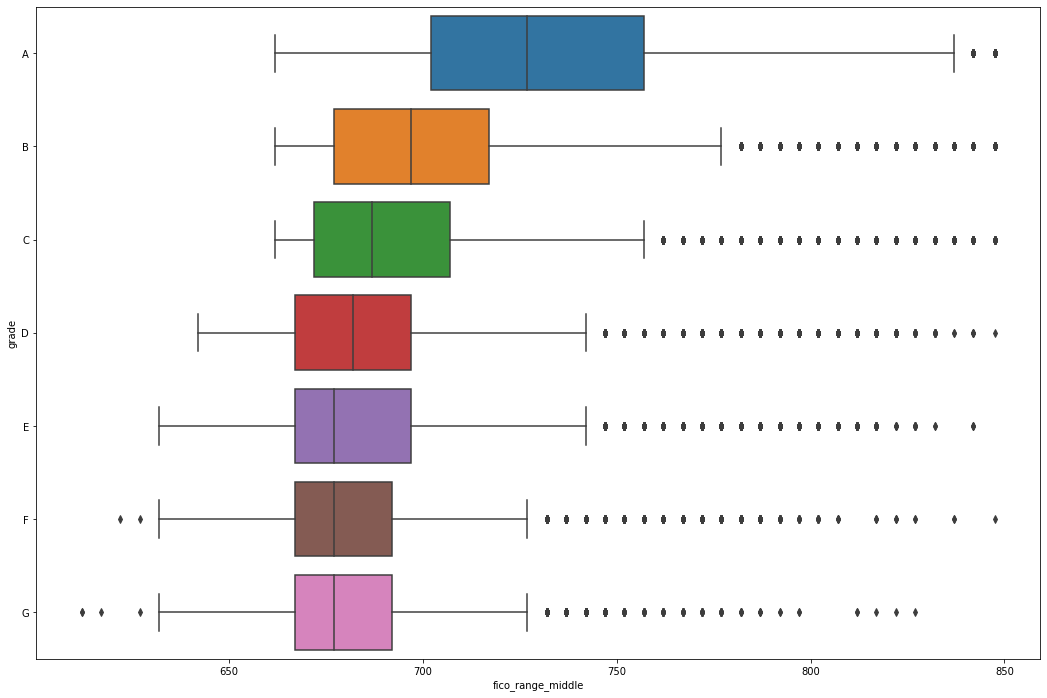

In [ ]:
plt.figure(figsize=(18, 12))
sns.boxplot(data= df, x = 'fico_range_middle', y = 'grade')

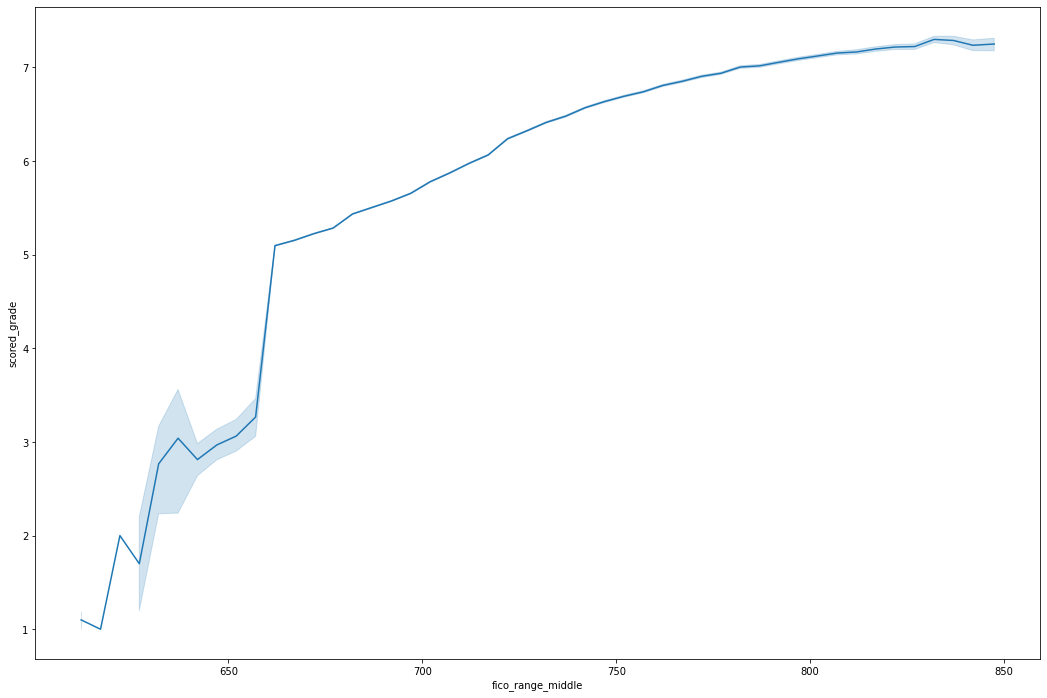

In [ ]:
plt.figure(figsize=(18, 12))
sns.lineplot(data= df, x = 'fico_range_middle', y = 'scored_grade')

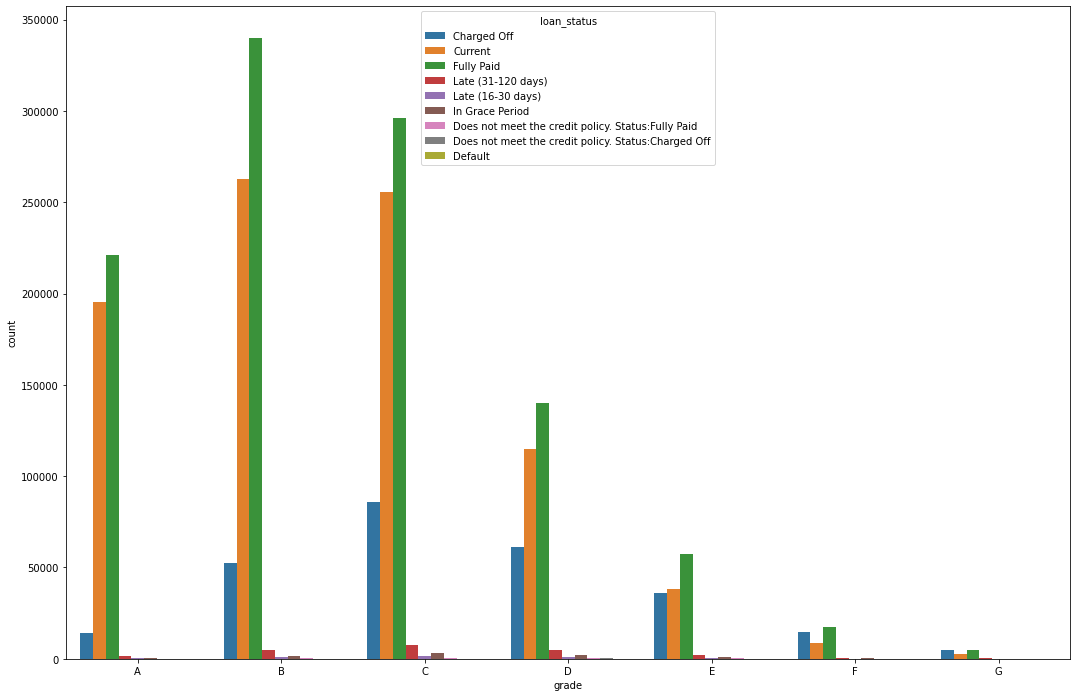

In [ ]:
plt.figure(figsize=(18, 12))
sns.countplot(data=df, x='grade', hue='loan_status')

In [ ]:
for grade in df['grade'].unique():
    rate = len(df[(df['loan_status'] == 'Charged Off') & (df['grade'] == grade)])/len(df[df['grade'] == grade])*100
    print(f"{grade} has {rate:.2f}%")


A has 3.28%
B has 7.92%
C has 13.18%
D has 18.82%
E has 26.57%
F has 34.67%
G has 37.48%


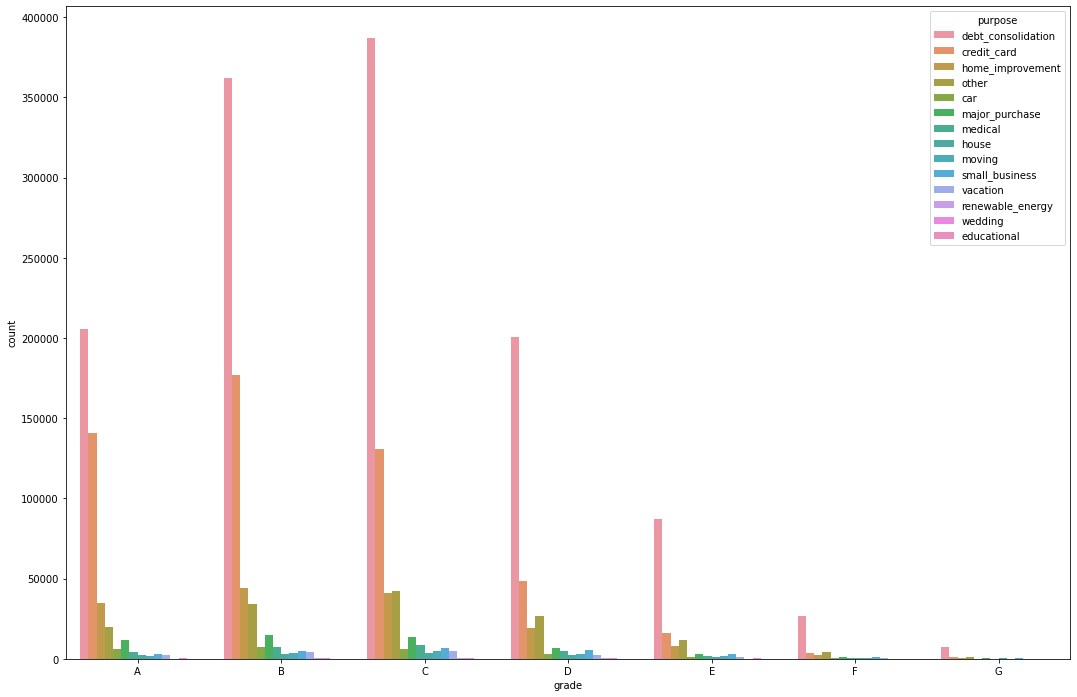

In [ ]:
plt.figure(figsize=(18, 12))
sns.countplot(data=df, x='grade', hue='purpose')

In [ ]:
for grade in df['grade'].unique():
    rate = len(df[(df['purpose'] == 'debt_consolidation') & (df['grade'] == grade)])/len(df[df['grade'] == grade])*100
    print(f"debt_consolidation, {grade} has {rate:.2f}%")


for grade in df['grade'].unique():
    rate = len(df[(df['purpose'] == 'credit_card') & (df['grade'] == grade)])/len(df[df['grade'] == grade])*100
    print(f"credit_card, {grade} has {rate:.2f}%")

for grade in df['grade'].unique():
    rate = len(df[(df['purpose'] == 'home_improvement') & (df['grade'] == grade)])/len(df[df['grade'] == grade])*100
    print(f"home_improvement, {grade} has {rate:.2f}%")

debt_consolidation, A has 47.55%
debt_consolidation, B has 54.54%
debt_consolidation, C has 59.58%
debt_consolidation, D has 61.93%
debt_consolidation, E has 64.33%
debt_consolidation, F has 64.58%
debt_consolidation, G has 62.41%
credit_card, A has 32.45%
credit_card, B has 26.64%
credit_card, C has 20.08%
credit_card, D has 15.03%
credit_card, E has 11.63%
credit_card, F has 8.99%
credit_card, G has 7.10%
home_improvement, A has 7.97%
home_improvement, B has 6.68%
home_improvement, C has 6.30%
home_improvement, D has 5.94%
home_improvement, E has 5.99%
home_improvement, F has 6.01%
home_improvement, G has 6.08%


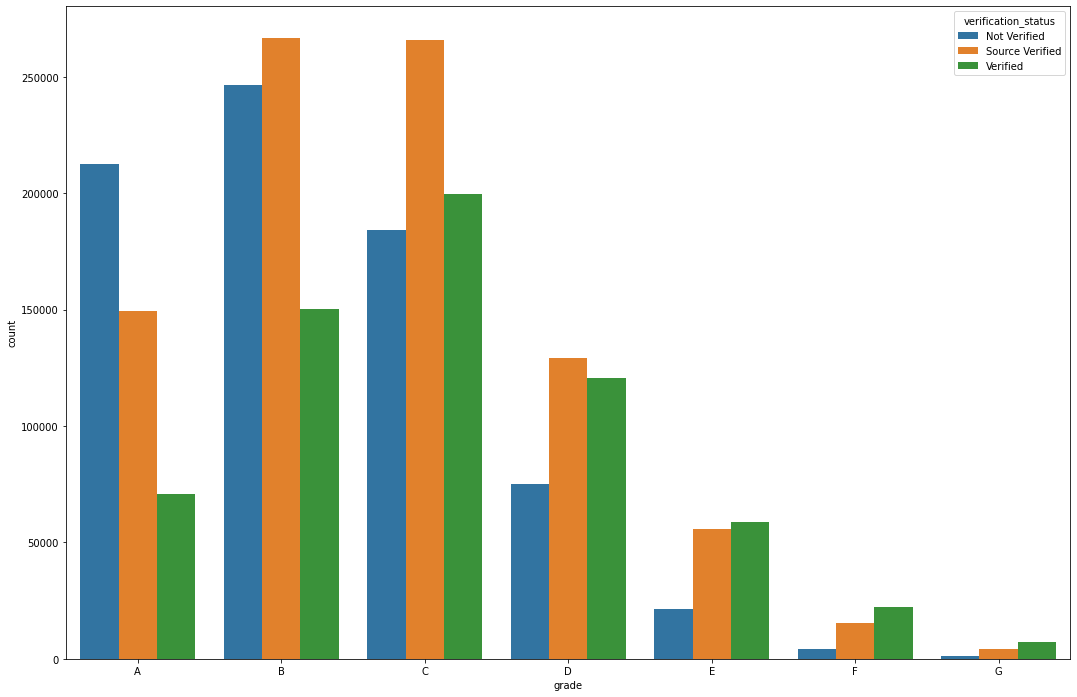

In [ ]:
plt.figure(figsize=(18, 12))
sns.countplot(data=df, x="grade", hue="verification_status")

In [ ]:
for grade in df['grade'].unique():
    rate = len(df[(df['verification_status'] == 'Not Verified') & (df['grade'] == grade)])/len(df[df['grade'] == grade])*100
    print(f"not_verified, {grade} has {rate:.2f}%")

for grade in df['grade'].unique():
    rate = len(df[(df['verification_status'] == 'Source Verified') & (df['grade'] == grade)])/len(df[df['grade'] == grade])*100
    print(f"Source verified, {grade} has {rate:.2f}%")

for grade in df['grade'].unique():
    rate = len(df[(df['verification_status'] == 'Verified') & (df['grade'] == grade)])/len(df[df['grade'] == grade])*100
    print(f"Verified, {grade} has {rate:.2f}%")

not_verified, A has 49.10%
not_verified, B has 37.15%
not_verified, C has 28.33%
not_verified, D has 23.09%
not_verified, E has 15.66%
not_verified, F has 10.37%
not_verified, G has 8.47%
Source verified, A has 34.51%
Source verified, B has 40.23%
Source verified, C has 40.92%
Source verified, D has 39.77%
Source verified, E has 40.96%
Source verified, F has 36.43%
Source verified, G has 33.08%
Verified, A has 16.38%
Verified, B has 22.62%
Verified, C has 30.75%
Verified, D has 37.14%
Verified, E has 43.38%
Verified, F has 53.20%
Verified, G has 58.45%


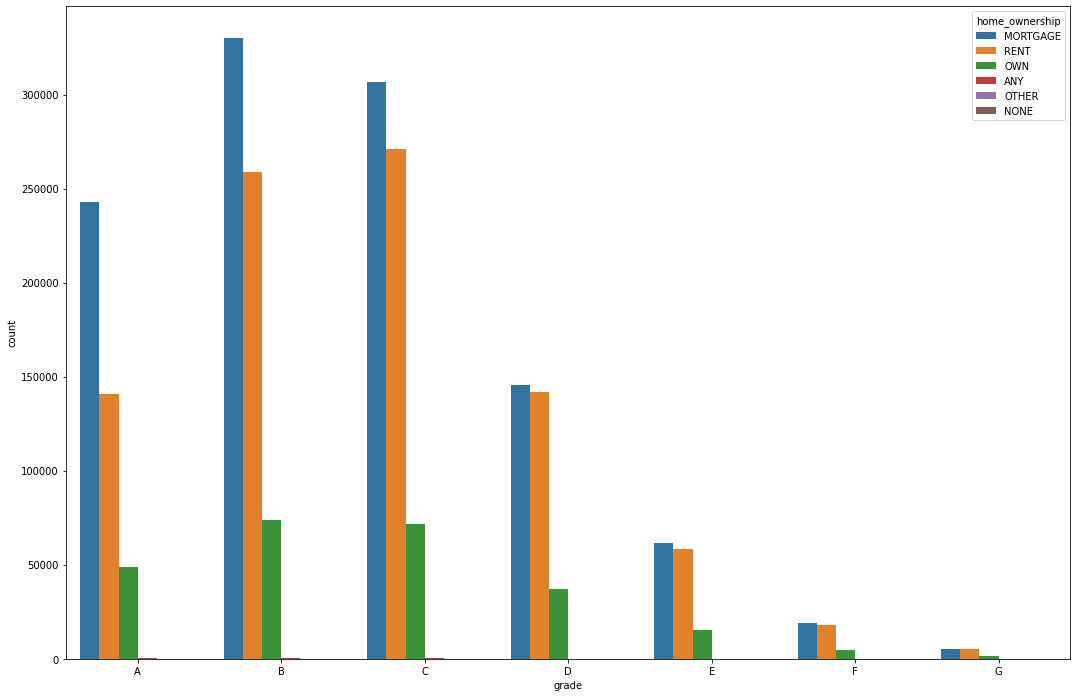

In [ ]:
plt.figure(figsize=(18, 12))
sns.countplot(data=df, x="grade", hue="home_ownership")

In [ ]:
for grade in df['grade'].unique():
    rate = len(df[(df['home_ownership'] == 'MORTGAGE') & (df['grade'] == grade)])/len(df[df['grade'] == grade])*100
    print(f"MORTGAGE, {grade} has {rate:.2f}%")

for grade in df['grade'].unique():
    rate = len(df[(df['home_ownership'] == 'RENT') & (df['grade'] == grade)])/len(df[df['grade'] == grade])*100
    print(f"RENT, {grade} has {rate:.2f}%")


for grade in df['grade'].unique():
    rate = len(df[(df['home_ownership'] == 'OWN') & (df['grade'] == grade)])/len(df[df['grade'] == grade])*100
    print(f"OWN, {grade} has {rate:.2f}%")

MORTGAGE, A has 56.07%
MORTGAGE, B has 49.79%
MORTGAGE, C has 47.16%
MORTGAGE, D has 44.88%
MORTGAGE, E has 45.52%
MORTGAGE, F has 45.19%
MORTGAGE, G has 44.96%
RENT, A has 32.55%
RENT, B has 39.04%
RENT, C has 41.73%
RENT, D has 43.67%
RENT, E has 43.16%
RENT, F has 43.49%
RENT, G has 43.10%
OWN, A has 11.32%
OWN, B has 11.11%
OWN, C has 11.06%
OWN, D has 11.39%
OWN, E has 11.27%
OWN, F has 11.26%
OWN, G has 11.81%
